## Group3
### Members
1.Andrea Ulloa (20172597)
2.Ana Angulo (20171627)
3.Angela Coapaza (20171636) 

# 3. Replication of the PM1_Notebook1_Prediction_newdata using a restricted da

## Introduction

In this wage example, Y is the hourly wage of a worker and X is a vector of worker's characteristics, e.g., education, experience, gender. Two main questions here are:

How to use job-relevant characteristics, such as education and experience, to best predict wages?

What is the difference in predicted wages between men and women with the same job-relevant characteristics?

In this lab, we focus on the prediction question first.

## Data

The data set we consider is from the March Supplement of the U.S. Current Population Survey, year 2015. We select white non-hispanic individuals, aged 25 to 64 years, and working more than 35 hours per week during at least 50 weeks of the year. We exclude self-employed workers; individuals living in group quarters; individuals in the military, agricultural or private household sectors; individuals with inconsistent reports on earnings and employment status; individuals with allocated or missing information in any of the variables used in the analysis; and individuals with hourly wage below  3 .

The variable of interest  Y  is the hourly wage rate constructed as the ratio of the annual earnings to the total number of hours worked, which is constructed in turn as the product of number of weeks worked and the usual number of hours worked per week. In our analysis, we also focus on single (never married) workers. The final sample is of size  **n=5150** .

## Data analysis

We start by loading the data set.

In [2]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Dates")
Pkg.add("Plots")
Pkg.add("RData")
using CSV
using DataFrames
using Dates
using Plots
using RData


    Updating registry at `C:\Users\acoap\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`


In [3]:
rdata_read = load("../../data/wage2015_subsample_inference.RData")
data=rdata_read["data"]
names(data)
println("Number of Rows : ", size(data)[1],"\n","Number of Columns : ", size(data)[2],) #rows and columns

Number of Rows : 5150
Number of Columns : 20


In [4]:
first(data,10)

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,9.61538,2.26336,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,48.0769,3.8728,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,11.0577,2.40313,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,13.9423,2.63493,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,28.8462,3.36198,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,11.7308,2.46222,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,19.2308,2.95651,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8,19.2308,2.95651,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,12.0,2.48491,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [40]:
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,wage,17.8544,3.36538,14.6154,528.846,,,Float64
2,lwage,2.71856,1.21354,2.68207,6.2707,,,Float64
3,sex,0.321948,0.0,0.0,1.0,,,Float64
4,shs,0.0872093,0.0,0.0,1.0,,,Float64
5,hsg,0.912791,0.0,1.0,1.0,,,Float64
6,scl,0.0,0.0,0.0,0.0,,,Float64
7,clg,0.0,0.0,0.0,0.0,,,Float64
8,ad,0.0,0.0,0.0,0.0,,,Float64
9,mw,0.286337,0.0,0.0,1.0,,,Float64


# 3.1. Filter the data

Now, we focus only on a subset of the data. For this porpouse, we use shs and hsg variables.

In [5]:
data_new = filter(row -> (row.shs == 1|| row.hsg == 1) , data)

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,11.0577,2.40313,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,19.2308,2.95651,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,19.2308,2.95651,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,12.0,2.48491,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,17.3077,2.85115,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6,12.0192,2.48651,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,27.8846,3.32808,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,21.6,3.07269,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,19.2308,2.95651,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Describing the main variables 

Let's go to **describe the main variables** that we will use later to obtain the causal effect of sex on income: 

wage, log-wage, sex, some college, college graduate, avdanced degree, experience

Let's have a look at the structure of the data.

In [29]:
describe(data_new)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,wage,23.6574,3.02198,19.2308,490.196,,,Float64
2,lwage,3.00002,1.10591,2.95651,6.19481,,,Float64
3,sex,0.470991,0.0,0.0,1.0,,,Float64
4,shs,0.0,0.0,0.0,0.0,,,Float64
5,hsg,0.0,0.0,0.0,0.0,,,Float64
6,scl,0.466754,0.0,0.0,1.0,,,Float64
7,clg,0.533246,0.0,1.0,1.0,,,Float64
8,ad,0.0,0.0,0.0,0.0,,,Float64
9,mw,0.265971,0.0,0.0,1.0,,,Float64


In [6]:
[eltype(col) for col = eachcol(data_new)]

20-element Vector{DataType}:
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 CategoricalValue{String, UInt16}
 CategoricalValue{String, UInt8}
 CategoricalValue{String, UInt8}
 CategoricalValue{String, UInt8}

In [7]:
# first 10 lines of the data
first(data_new,10)

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,11.0577,2.40313,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,19.2308,2.95651,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,19.2308,2.95651,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,12.0,2.48491,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,17.3077,2.85115,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6,12.0192,2.48651,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,27.8846,3.32808,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,21.6,3.07269,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,19.2308,2.95651,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [8]:
typeof(data_new), size(data_new)

(DataFrame, (1376, 20))

#### Wage and lwage

The following graph shows the hourly wage density. As can be seen, the distribution has a large tail to the right (positive asymmetric distribution), that is, there are unusually high values. While most observations are concentrated in values less than 100.

In [49]:
Pkg.add("Gadfly")
using Gadfly

   Resolving package versions...
   Installed Media ────────── v0.5.0
   Installed Hexagons ─────── v0.2.0
   Installed Loess ────────── v0.5.4
   Installed IndirectArrays ─ v1.0.0
   Installed Juno ─────────── v0.8.4
   Installed CoupledFields ── v0.2.0
   Installed Compose ──────── v0.9.3
   Installed Gadfly ───────── v1.3.4
    Updating `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  [c91e804a] + Gadfly v1.3.4
    Updating `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
  [a81c6b42] + Compose v0.9.3
  [7ad07ef1] + CoupledFields v0.2.0
  [c91e804a] + Gadfly v1.3.4
  [a1b4810d] + Hexagons v0.2.0
  [9b13fd28] + IndirectArrays v1.0.0
  [e5e0dc1b] + Juno v0.8.4
  [4345ca2d] + Loess v0.5.4
  [e89f7d12] + Media v0.5.0
  [9abbd945] + Profile
Precompiling project...
  ✓ Hexagons
  ✓ Loess
  ✓ IndirectArrays
  ✓ Media
  ✓ CoupledFields
  ✓ Juno
  ✓ Compose
  ✓ Gadfly
  8 dependencies successfully precompiled in 14 seconds (184 already precompiled, 21 skipped during auto due t

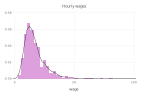

In [69]:
Gadfly.plot(data_new, Coord.cartesian(xmin=0, xmax=100),
    layer(x = "wage", Geom.density , color=[colorant"black"]),
    layer(x = "wage", Geom.histogram(bincount=200, density=true, limits=(min=0,)),
    color=[colorant"plum"]),
    Guide.title("Hourly wages")
)

Due to the problem of outlayers, the variable of the logarithm of wages is created. This corrects the asymmetry presented by the original data.

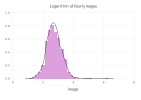

In [68]:
Gadfly.plot(data_new, Coord.cartesian(xmin=0, xmax=8),
    layer(x = "lwage", Geom.density , color=[colorant"black"]),
    layer(x = "lwage", Geom.histogram(bincount=30, density=true, limits=(min=0,)),
    color=[colorant"plum"]),
    Guide.title("Logarithm of hourly wages")
)

#### lwage and sex by grade

In [71]:
Pkg.add("Distributions")
using Distributions

   Resolving package versions...
    Updating `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  [31c24e10] + Distributions v0.25.45
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`


In [79]:
Pkg.add("Plots")
using Plots
sns.set_style('darkgrid', {'axes.linewidth': 2, 'axes.edgecolor':'black'})

   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`


LoadError: syntax: character literal contains multiple characters

LoadError: UndefVarError: plot not defined

Now, we are constructing the output variable $Y$ and the matrix $Z$ which includes the characteristics of workers that are given in the data.

In [9]:
n = size(data_new)[1]
z = select(data_new, Not([:lwage, :wage]))
p = size(z)[2] 

println("Number of observations : ", n, "\n","Number of raw regressors:", p )

Number of observations : 1376
Number of raw regressors:18


For the outcome variable *wage* and a subset of the raw regressors, we calculate the empirical mean to get familiar with the data.

In [10]:
z_subset = select(data_new, ["lwage","sex","shs","hsg","scl","clg","ad","mw","so","we","ne","exp1"])
describe(z_subset, :mean)

,variable,mean
,Symbol,Float64
1,lwage,2.71856
2,sex,0.321948
3,shs,0.0872093
4,hsg,0.912791
5,scl,0.0
6,clg,0.0
7,ad,0.0
8,mw,0.286337
9,so,0.291424


The proportion of female workers in our sample is ~32% ( 𝑠𝑒𝑥=1 if female). Compared to the full data set (44%), this percentage is lower.

# Prediction Question


Now, we will construct a prediction rule for hourly wage $Y$ , which depends linearly on job-relevant characteristics  $X$:

$$Y = \beta' X + \epsilon $$
 
Our goals are

* Predict wages using various characteristics of workers.

* Assess the predictive performance using the (adjusted) sample MSE, the (adjusted) sample $R^2$ and the out-of-sample $MSE$ and $R^2$.

We employ two different specifications for prediction:

- **Basic Model**: $X$ consists of a set of raw regressors (e.g. gender, experience, education indicators, occupation and industry indicators, regional indicators). That is sex + exp1 + shs + hsg + mw + so + we + occ2+ ind2'

- **Flexible Model**: $X$ consists of all raw regressors from the basic model without sex plus occupation and industry indicators, transformations (e.g.,$exp2$, $exp3$ and $exp4$ ) and additional two-way interactions of polynomial in experience with other regressors.  That is (exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)

Using the **Flexible Model**, enables us to approximate the real relationship by a more complex regression model and therefore to reduce the bias. The **Flexible Model** increases the range of potential shapes of the estimated regression function. In general, flexible models often deliver good prediction accuracy but give models which are harder to interpret.

Now, let us fit both models to our data by running ordinary least squares (ols):

In [11]:
#Needed Packages and extra just in case
Pkg.add("Plots")
Pkg.add("Lathe")
Pkg.add("GLM")
Pkg.add("StatsPlots")
Pkg.add("MLBase")

# Load the installed packages
using DataFrames
using CSV
using Plots
using Lathe
using GLM
using Statistics
using StatsPlots
using MLBase

   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`


In [12]:
#basic model
basic  = @formula(lwage ~ (sex + exp1 + shs + hsg + scl + clg + mw + so + we + occ2+ ind2))
basic_results  = lm(basic, data_new)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

lwage ~ 1 + sex + exp1 + shs + hsg + scl + clg + mw + so + we + occ2 + ind2

Coefficients:
────────────────────────────────────────────────────────────────────────────────────
                   Coef.    Std. Error       t  Pr(>|t|)     Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)   2.75187       0.144638     19.03    <1e-70    2.46813       3.03562
sex          -0.0733094     0.0314431    -2.33    0.0199   -0.134993     -0.0116259
exp1          0.00757417    0.00125148    6.05    <1e-08    0.00511908    0.0100293
shs           0.0         NaN           NaN       NaN     NaN           NaN
hsg           0.0811342     0.0454977     1.78    0.0748   -0.00812098    0.170389
scl           0.0         NaN           NaN       NaN     NaN      

We have to drop the hsg, scl and clg variables because of multicolinearity.

In [29]:
# 1. basic model
basic  = @formula(lwage ~ (sex + exp1 + shs + hsg+ scl + clg + mw + so + we + occ2+ ind2))
basic_results  = lm(basic, data_new)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

lwage ~ 1 + sex + exp1 + shs + hsg + scl + clg + mw + so + we + occ2 + ind2

Coefficients:
────────────────────────────────────────────────────────────────────────────────────
                   Coef.    Std. Error       t  Pr(>|t|)     Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)   2.75187       0.144638     19.03    <1e-70    2.46813       3.03562
sex          -0.0733094     0.0314431    -2.33    0.0199   -0.134993     -0.0116259
exp1          0.00757417    0.00125148    6.05    <1e-08    0.00511908    0.0100293
shs           0.0         NaN           NaN       NaN     NaN           NaN
hsg           0.0811342     0.0454977     1.78    0.0748   -0.00812098    0.170389
scl           0.0         NaN           NaN       NaN     NaN      

##### Note that the basic model consists of $48$ regressors. Three regressors were dropped out.

In [83]:

Pkg.add("StatsModels")
Pkg.add("Combinatorics")
Pkg.add("IterTools")
using StatsModels, Combinatorics, IterTools

combinations_upto(x, n) = Iterators.flatten(combinations(x, i) for i in 1:n)
expand_exp(args, deg::ConstantTerm) =
    tuple(((&)(terms...) for terms in combinations_upto(args, deg.n))...)

StatsModels.apply_schema(t::FunctionTerm{typeof(^)}, sch::StatsModels.Schema, ctx::Type) =
    apply_schema.(expand_exp(t.args_parsed...), Ref(sch), ctx)

StatsModels.apply_schema(t::FunctionTerm{typeof(^)}, sch::StatsModels.FullRank, ctx::Type) =
    apply_schema.(expand_exp(t.args_parsed...), Ref(sch), ctx)

   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
    Updating `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  [c8e1da08] + IterTools v1.4.0
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`


In [86]:
# 2. flexible model
flex = @formula(lwage ~ sex + ((exp1+exp2+exp3+exp4+shs+hsg+scl+clg+occ2+ind2+mw+so+we)^2))
regflex = lm(flex, data_new)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

lwage ~ 1 + sex + exp1 + exp2 + exp3 + exp4 + shs + hsg + scl + clg + occ2 + ind2 + mw + so + we + exp1 & exp2 + exp1 & exp3 + exp1 & exp4 + exp1 & shs + exp1 & hsg + exp1 & scl + exp1 & clg + exp1 & occ2 + exp1 & ind2 + exp1 & mw + exp1 & so + exp1 & we + exp2 & exp3 + exp2 & exp4 + exp2 & shs + exp2 & hsg + exp2 & scl + exp2 & clg + exp2 & occ2 + exp2 & ind2 + exp2 & mw + exp2 & so + exp2 & we + exp3 & exp4 + exp3 & shs + exp3 & hsg + exp3 & scl + exp3 & clg + exp3 & occ2 + exp3 & ind2 + exp3 & mw + exp3 & so + exp3 & we + exp4 & shs + exp4 & hsg + exp4 & scl + exp4 & clg + exp4 & occ2 + exp4 & ind2 + exp4 & mw + exp4 & so + exp4 & we + shs & hsg + shs & scl + shs & clg + shs & occ2 + shs & ind2 + shs & mw + shs & so + shs & we + hsg & scl + hsg & clg + hsg & occ2 + hsg & ind2 + hsg & mw + hsg & so + hsg & we

# Try Lasso next

In [34]:
Pkg.add("Lasso")
using Lasso

   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`


In [85]:
flex_1 =  @formula(lwage ~ sex + ((exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)^2))
lasso_model = fit(LassoModel, flex, data_new)

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso C:\Users\acoap\.julia\packages\Lasso\H8WCl\src\Lasso.jl:360


LoadError: ArgumentError: start and stop must be finite, got NaN and NaN